In [13]:
from pydantic import BaseModel
from langgraph.graph import StateGraph, END


In [14]:
class ChatState(BaseModel):
    user_message: str
    intent: str = None

In [15]:
def detect_intent(state: ChatState):
    print("search_buses")
    return state

def general_chat(state: ChatState):
    print("general_chat")
    return state

def ask_for_info(state: ChatState):
    print("ask_for_info")
    return state

def provider_info(state: ChatState):
    print("provider_info")
    return state

def book_ticket(state: ChatState):
    print("book_ticket")
    return state

def view_ticket(state: ChatState):
    print("view_ticket")
    return state

def cancel_ticket(state: ChatState):
    print("cancel_ticket")
    return state

In [16]:
graph = StateGraph(ChatState)

In [17]:
graph.add_node("general_chat", general_chat)
graph.add_node("detect_intent", detect_intent)
graph.add_node("ask_for_info", ask_for_info)
graph.add_node("provider_info", provider_info)
graph.add_node("book_ticket", book_ticket)
graph.add_node("view_ticket", view_ticket)
graph.add_node("cancel_ticket", cancel_ticket)

In [18]:
graph.set_entry_point("detect_intent")

In [19]:
graph.add_conditional_edges(
    "detect_intent",
    lambda state: state.intent,
    {
        "general_chat": "general_chat",
        "ask_for_info": "ask_for_info",
        "provider_info": "provider_info",
        "book_ticket": "book_ticket",
        "view_ticket": "view_ticket",
        "cancel_ticket": "cancel_ticket",
    }
)

In [20]:
for f in ["general_chat", "ask_for_info", "provider_info", "book_ticket", "view_ticket", "cancel_ticket"]:
    graph.add_edge(f, END)

In [21]:
flow = graph.compile()

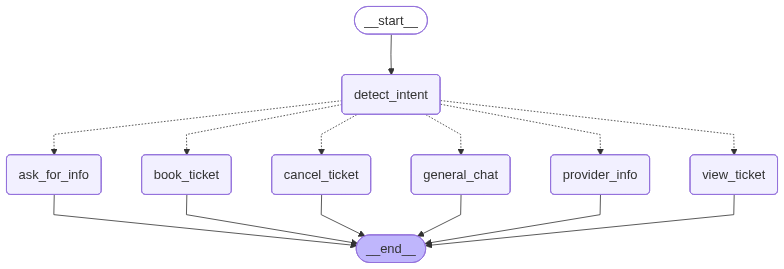

In [22]:
from IPython.display import Image
Image(flow.get_graph().draw_mermaid_png())